# Day 3 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of F02-1_logs.las well from the data folder
## Perform the below Tasks:

>1. Plot well logs using matplotlib for every well-log in the las file 
2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. Calculate the VP log from the DT sonic curve.
4. Calculate the VP log using AI and RHOB log. 
4. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?   

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio
F02 = lasio.read("C:/Users/GoSmart/Documents/GitHub/d/10DaysChallenge/Dutch_F3_Logs/F02-1_logs.las")

In [4]:
display(F02)
F02.keys()

['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']

# The First Task

the answer of the first question


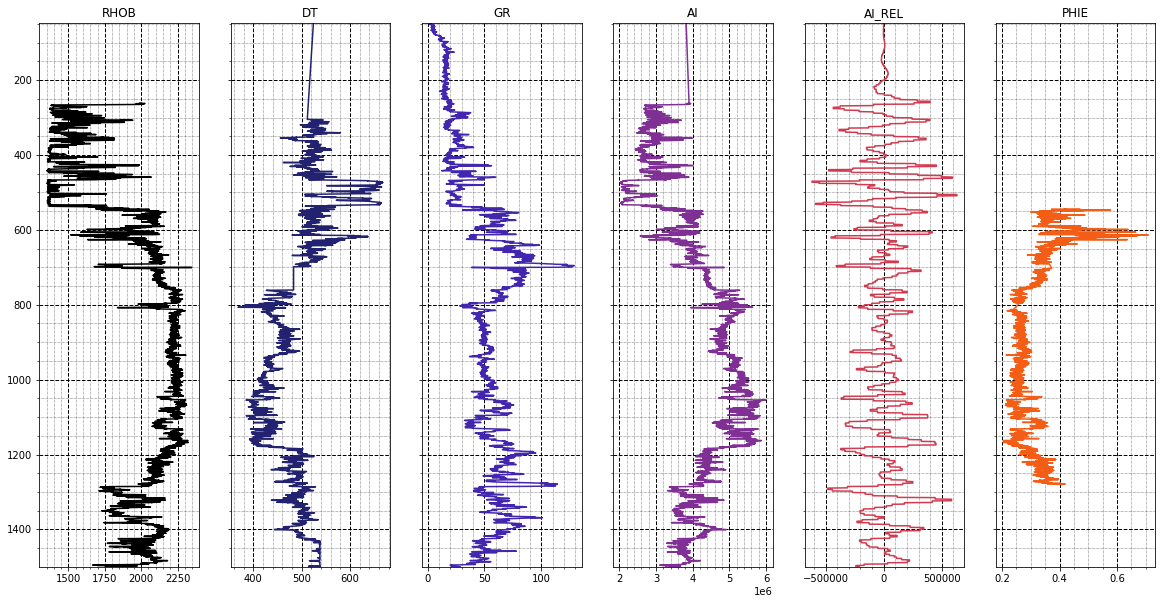

In [21]:
F02_df=F02.df()

from matplotlib import pyplot as plt

import matplotlib as mpl

rows, cols = 1, F02_df.shape[1]

cmap = mpl.cm.CMRmap

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE', 'MD', 'VP']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black', 'green', 'violet']
for i in range(cols):
    ax[i].plot(F02_df.iloc[:,i], F02_df.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(F02_df.index), min(F02_df.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    ax[i].set_title('%s' %names[i])

# The Second task

In [20]:
# i dont know how i can calculate the 10% and 90%
F02_df.describe()


,RHOB,DT,GR,AI,AI_REL,PHIE
count,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


# The Third Task

In [39]:
a= 0.23
b= 0.25
F02_df['VP_DT'] =(a * (F02_df['DT']**b))*1000
F02_df.keys()
F02_df.head(10)

,RHOB,DT,GR,AI,AI_REL,PHIE,VP_DT,VP_AI_RHOB
DEPTH,,,,,,,,
48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN,1100.450993,NaN
48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN,1100.447055,NaN
48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN,1100.443171,NaN
48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN,1100.439286,NaN
48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN,1100.435506,NaN
48.75,NaN,524.0117,NaN,3820525.75,-455.6956,NaN,1100.431673,NaN
48.90,NaN,524.0042,NaN,3820580.00,-455.6956,NaN,1100.427736,NaN
49.05,NaN,523.9968,NaN,3820634.25,-455.6956,NaN,1100.423851,NaN
49.20,NaN,523.9893,NaN,3820688.75,-455.6956,NaN,1100.419913,NaN


# The Fourth Task

In [40]:
F02_df['VP_AI_RHOB'] =F02_df['AI'] / F02_df['RHOB']
F02_df.keys()
F02_df.head(10)
F02_df.tail(10)

,RHOB,DT,GR,AI,AI_REL,PHIE,VP_DT,VP_AI_RHOB
DEPTH,,,,,,,,
1498.5000,1817.8043,522.1594,21.6529,3483096.00,-239115.9375,NaN,1099.457918,1916.100650
1498.6500,1807.6801,534.5205,20.9907,3382057.25,-239115.9375,NaN,1105.907816,1870.937922
1498.8000,1834.6796,537.4792,20.9907,3413485.25,-239115.9375,NaN,1107.435016,1860.534804
1498.9501,1864.3063,537.3594,22.1502,3469389.25,-239115.9375,NaN,1107.373302,1860.954528
1499.1001,1811.7836,535.3020,24.9948,3384413.00,-239115.9375,NaN,1106.311820,1868.000682
1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN,1104.691428,1879.120317
1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN,1106.083895,1869.600800
1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN,1107.286121,1861.533886
1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN,1107.323634,1861.285814


# The FiFth Task

In [46]:
# I have error please check if it from my Paython or problem at code

from matplotlib import pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(20,5))

plt.plot(F02_df.DEPTH, F02_df.VP_DT, label = 'VP_DT', c= 'r')
plt.plot(F02_df.DEPTH, F02_df.VP_AI_RHOB, label = 'VP_AI_RHOB', c = 'b')
plt.title('VP_DT and VP_AI_RHOB with DEPTH plot ')
plt.xlabel('DEPTH')
plt.ylabel('VP')
plt.legend(loc = 'upper left')
plt.show();

AttributeError: 'LASFile' object has no attribute 'DEPTH'

<Figure size 1440x360 with 0 Axes>